In [25]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data = "data/mouse_drug_data.csv"

clinical_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_data)

clinical = pd.read_csv(clinical_data)

# Combine the data into a single dataset
merging_data = pd.merge (mouse,clinical, how = "left", on=["Mouse ID","Mouse ID"])

merging_data.head()
# Display the data table for preview


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [26]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumor_mean = merging_data.groupby(["Drug","Timepoint"]).mean ()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_mean = pd.DataFrame(tumor_mean) 

tumor_mean

# Preview DataFrame


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [27]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

tumor_sem = merging_data.groupby(["Drug","Timepoint"]).sem ()["Tumor Volume (mm3)"]

# Convert to DataFrame

tumor_sem = pd.DataFrame(tumor_sem) 

tumor_sem
# Preview DataFrame



Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [28]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean = tumor_mean.reset_index()

tumor_mean_df = tumor_mean.pivot(index ="Timepoint",columns = "Drug")["Tumor Volume (mm3)"]

tumor_sem_df = tumor_sem.reset_index()

tumor_sem_df = tumor_mean.pivot(index ="Timepoint",columns = "Drug")["Tumor Volume (mm3)"]

tumor_mean_df.head(10)
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


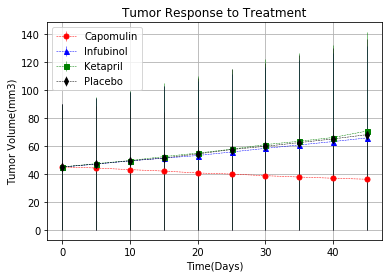

In [29]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_mean_df.index,tumor_mean_df["Capomulin"], yerr = tumor_sem_df["Capomulin"], 
             color = 'r', marker = 'o', markersize = 5, linestyle = '--', linewidth = 0.50)
plt.errorbar(tumor_mean_df.index,tumor_mean_df["Infubinol"], yerr = tumor_sem_df["Infubinol"],
             color = 'b', marker = '^', markersize = 5, linestyle = '--', linewidth = 0.50)
plt.errorbar(tumor_mean_df.index,tumor_mean_df["Ketapril"], yerr = tumor_sem_df["Ketapril"],
             color = 'g', marker = 's', markersize = 5, linestyle = '--', linewidth = 0.50)
plt.errorbar(tumor_mean_df.index,tumor_mean_df["Placebo"], yerr = tumor_sem_df["Placebo"],
             color = 'k', marker = 'd', markersize = 5, linestyle = '--', linewidth = 0.50)

plt.grid(True)
plt.title ('Tumor Response to Treatment')
plt.ylabel ('Tumor Volume(mm3)')
plt.xlabel ('Time(Days)')
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'],loc="upper left")

# Save the Figure


plt.savefig("Tumor_response_Figure1.png")

plt.show()



## Metastatic Response to Treatment

In [30]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_mean = merging_data.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
# Convert to DataFrame
metastatic_mean = pd.DataFrame(metastatic_mean) 
# Preview DataFrame
metastatic_mean


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [31]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_sem = merging_data.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
# Convert to DataFrame
metastatic_sem = pd.DataFrame(metastatic_sem) 
# Preview DataFrame
metastatic_sem

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [32]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_mean = metastatic_mean.reset_index()
metastatic_mean_df= metastatic_mean.pivot(index = 'Timepoint', columns = 'Drug')['Metastatic Sites']

metastatic_sem = metastatic_sem.reset_index()
metastatic_sem_df= metastatic_sem.pivot(index = 'Timepoint', columns = 'Drug')['Metastatic Sites']

# Preview that Reformatting worked

metastatic_mean_df.head() 



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


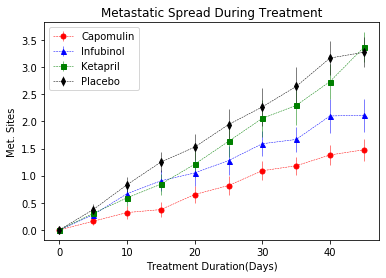

In [33]:
# Generate the Plot (with Error Bars)
plt.errorbar(metastatic_mean_df.index, metastatic_mean_df['Capomulin'], yerr = metastatic_sem_df["Capomulin"],
            color = 'r', marker = 'o', markersize = 5, linestyle = '--', linewidth = 0.5)

plt.errorbar(metastatic_mean_df.index, metastatic_mean_df['Infubinol'], yerr = metastatic_sem_df["Infubinol"],
            color = 'b', marker = '^', markersize = 5, linestyle = '--', linewidth = 0.5)

plt.errorbar(metastatic_mean_df.index, metastatic_mean_df['Ketapril'], yerr = metastatic_sem_df["Ketapril"],
            color = 'g', marker = 's', markersize = 5, linestyle = '--', linewidth = 0.5)

plt.errorbar(metastatic_mean_df.index, metastatic_mean_df['Placebo'], yerr = metastatic_sem_df["Ketapril"],
            color = 'k', marker = 'd', markersize = 5, linestyle = '--', linewidth = 0.5)


plt.title ("Metastatic Spread During Treatment")

plt.ylabel("Met. Sites")

plt.xlabel("Treatment Duration(Days)")

plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'])
# Save the Figure

plt.savefig("Metastatic_spread_Figure2.png")

# Show the Figure

plt.show()

## Survival Rates

In [34]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = merging_data.groupby(["Drug","Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
mice_count = pd.DataFrame({"Mouse Count":mice_count})

# Preview DataFrame
mice_count

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
...                          ...
Zoniferol 25                  16
          30                  15
          35                  14
          40                  14
          45                  14

[100 rows x 1 columns]

In [35]:
# Minor Data Munging to Re-Format the Data Frames

mice_count = mice_count.reset_index()

mice_count_df = mice_count.pivot(index = "Timepoint", columns = "Drug")["Mouse Count"]

# Preview the Data Frame

mice_count_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


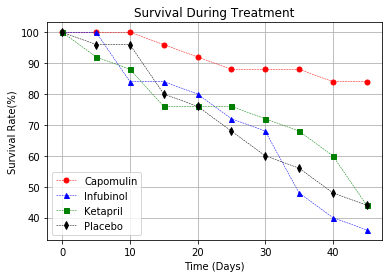

In [36]:
# Generate the Plot (Accounting for percentages)
capomulin_handle = plt.plot(100 * mice_count_df['Capomulin']/25,
            color = 'r', marker = 'o', markersize = 5, linestyle = '--', linewidth = 0.5)

infubinol_handle = plt.plot(100 * mice_count_df['Infubinol']/25,
            color = 'b', marker = '^', markersize = 5, linestyle = '--', linewidth = 0.5)

ketapril_handle = plt.plot(100 * mice_count_df['Ketapril']/25,
            color = 'g', marker = 's', markersize = 5, linestyle = '--', linewidth = 0.5)

Placebo_handle = plt.plot(100 * mice_count_df['Placebo']/25,
            color = 'k', marker = 'd', markersize = 5, linestyle = '--', linewidth = 0.5)


plt.title ("Survival During Treatment")

plt.ylabel ("Survival Rate(%)")

plt.xlabel ("Time (Days)")

plt.grid()

plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'])
# Save the Figure

plt.savefig("Survivial_rate_Figure3.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [37]:
# Calculate the percent changes for each drug
drug_change = tumor_mean_df.columns
x = tumor_mean_df.iloc[-1]
y = tumor_mean_df.iloc[0]

per_drug_change = ((x-y)/y)*100
# Display the data to confirm
per_drug_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

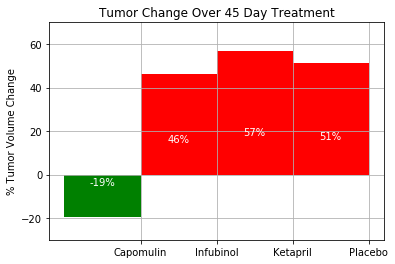

In [38]:
# Store all Relevant Percent Changes into a Tuple

per_change = (per_drug_change['Capomulin'],
              per_drug_change['Infubinol'],
              per_drug_change['Ketapril'],
              per_drug_change['Placebo'])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
col = np.arange(len(per_change))

ifpass = ax.bar(col[0],per_change[0], width = 1, color = 'g')

iffail = ax.bar(col[1:],per_change[1:],width = 1, color = 'r')

# Orient widths. Add labels, tick marks, etc. 
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_xticks(col + 0.5)
ax.set_ylabel("% Tumor Volume Change")
ax.set_ylim([-30,70])
ax.set_autoscaley_on(False)
ax.grid()

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.,.30*height,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
                
autolabel(iffail)
                
autolabel(ifpass)
                
# Save the Figure
fig.savefig("Tumor_change_Figure4.png")

# Show the Figure
fig.show()